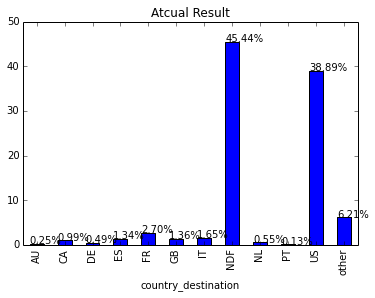

Decision tree prediction score: 0.533110188227
accuracy 0.516983471074


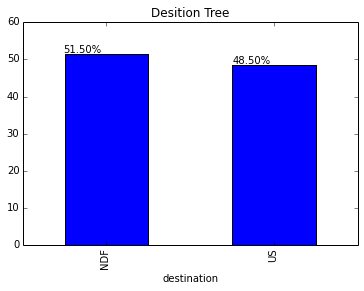

Random forest prediction score: 0.690985350937
accuracy 0.468429752066


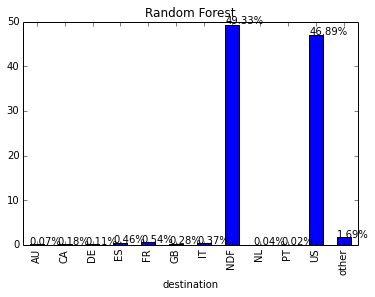

In [2]:
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Processing training dataset
train_users = pd.read_csv('train_users.csv')
train_users = train_users.drop(['date_account_created','timestamp_first_active','date_first_booking'],axis = 1)
train_users = train_users[(18 <= train_users.age) & (train_users.age <= 100)]
train_users = train_users.dropna()
features = train_users.keys()

test_users = pd.read_csv('test_users.csv')
test_users = test_users.drop(['date_account_created','timestamp_first_active','date_first_booking'],axis = 1)
test_users = test_users[(18 <= test_users.age) & (test_users.age <= 100)]
test_users = test_users.dropna()

# Transform data into dataframe
df = pd.DataFrame(columns = train_users.columns)
tdf = pd.DataFrame(columns = test_users.columns)

# Categorize lables
le = preprocessing.LabelEncoder()
for column in train_users:
    if column == 'age' or column == 'id' or column == 'signup_flow':
        df[column] = train_users[column]
        continue
    enc = le.fit(train_users[column])
    df[column] = le.transform(train_users[column])

# Split the data set
# Use 80% as the training data, the rest as the test data
trdf = df[0:int(0.8*len(df))]
tdf = df[int(0.8*len(df)):]
country_dic = {0:'AU', 1:'CA', 2:'DE', 3:'ES', 4:'FR', 5:'GB', 6:'IT', 7:'NDF', 8:'NL', 9:'PT', 10:'US', 11:'other'}

# Data matrix
data = trdf.as_matrix()
pred = tdf.as_matrix()
X = data[:,1:-1].astype(int)
Y = data[:,-1].astype(int)
predict = pred[:,1:-1].astype(int)

# Visualize the actual result for the test data
cor_result = train_users[int(0.8*len(train_users)):].groupby(['country_destination']).size()
cor_result = cor_result.groupby(level=0).apply(lambda x: 100*x/float(cor_result.sum()))
ax = cor_result.plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str("%.2f" %p.get_height())+"%", (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Atcual Result')
plt.show()

# Visualize result method
def result_plot(model,Z):
    result = pd.DataFrame(columns=['id','destination'])
    result['id'] = test_users['id']
    result['destination'] = Z
    des = result.groupby(['destination']).size()
    des = des.groupby(level=0).apply(lambda x: 100*x/float(des.sum()))
    ax=des.plot(kind = 'bar')
    for p in ax.patches:
        ax.annotate(str("%.2f" %p.get_height())+"%", (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.title(model)
    plt.show()

def accuracy(Z,pred):
    correct = 0
    for i in range(0,len(pred[:,-1])):
        if Z[i]== pred[:,-1][i]:
            correct += 1
    print 'accuracy',float(correct)/len(Z)

# Decision Tree Model
dt = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes = 20,min_samples_split=200,random_state = 100)
dt.fit(X, Y)
Z = pd.Series(dt.predict(predict))
print 'Decision tree prediction score:', dt.score(X,Y)
accuracy(Z,pred)
Z = Z.map(country_dic)
result_plot('Desition Tree',Z)

# Random Forests 
rf = RandomForestClassifier(n_estimators=200,criterion='entropy')
rf.fit(X, Y)
Z = pd.Series(rf.predict(predict))
print 'Random forest prediction score:', rf.score(X,Y)
accuracy(Z,pred)
Z = Z.map(country_dic)
result_plot('Random Forest',Z)
